In [107]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

In [108]:
with open("E:\\Research\\Statue gen output\\Curve_300Gen_6.txt", 'r') as f:
    PARAMS = f.readlines()

In [109]:
from ast import literal_eval

In [110]:
PARAMS=literal_eval(PARAMS[0])

In [111]:
len(PARAMS)

301

In [112]:
GENERATIONS=300
OUTPUT_PATH="E:\\Research\\Statue Generator\\Generations\\Entropy -5"
POPULATION_SIZE=10

In [113]:
def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,6)

In [114]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS+1):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    if (GEN_NUM-1)%50==0:
    
        for i in range(POPULATION_SIZE):

            entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
            entropy=entropy/8 

            fitness=entropy
            FITNESS.append(round(fitness,6))

        ALL_FITNESS.append(FITNESS)

        BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
        print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')

    GEN_NUM+=1

Statue-9 has the best fitness value in 0 generation.
Statue-8 has the best fitness value in 50 generation.
Statue-0 has the best fitness value in 100 generation.
Statue-7 has the best fitness value in 150 generation.
Statue-2 has the best fitness value in 200 generation.
Statue-0 has the best fitness value in 250 generation.
Statue-5 has the best fitness value in 300 generation.
Wall time: 31.3 s


In [115]:
GENS=[0,50,100,150,200,250,300]

In [116]:
BEST_FITNESS

[9, 8, 0, 7, 2, 0, 5]

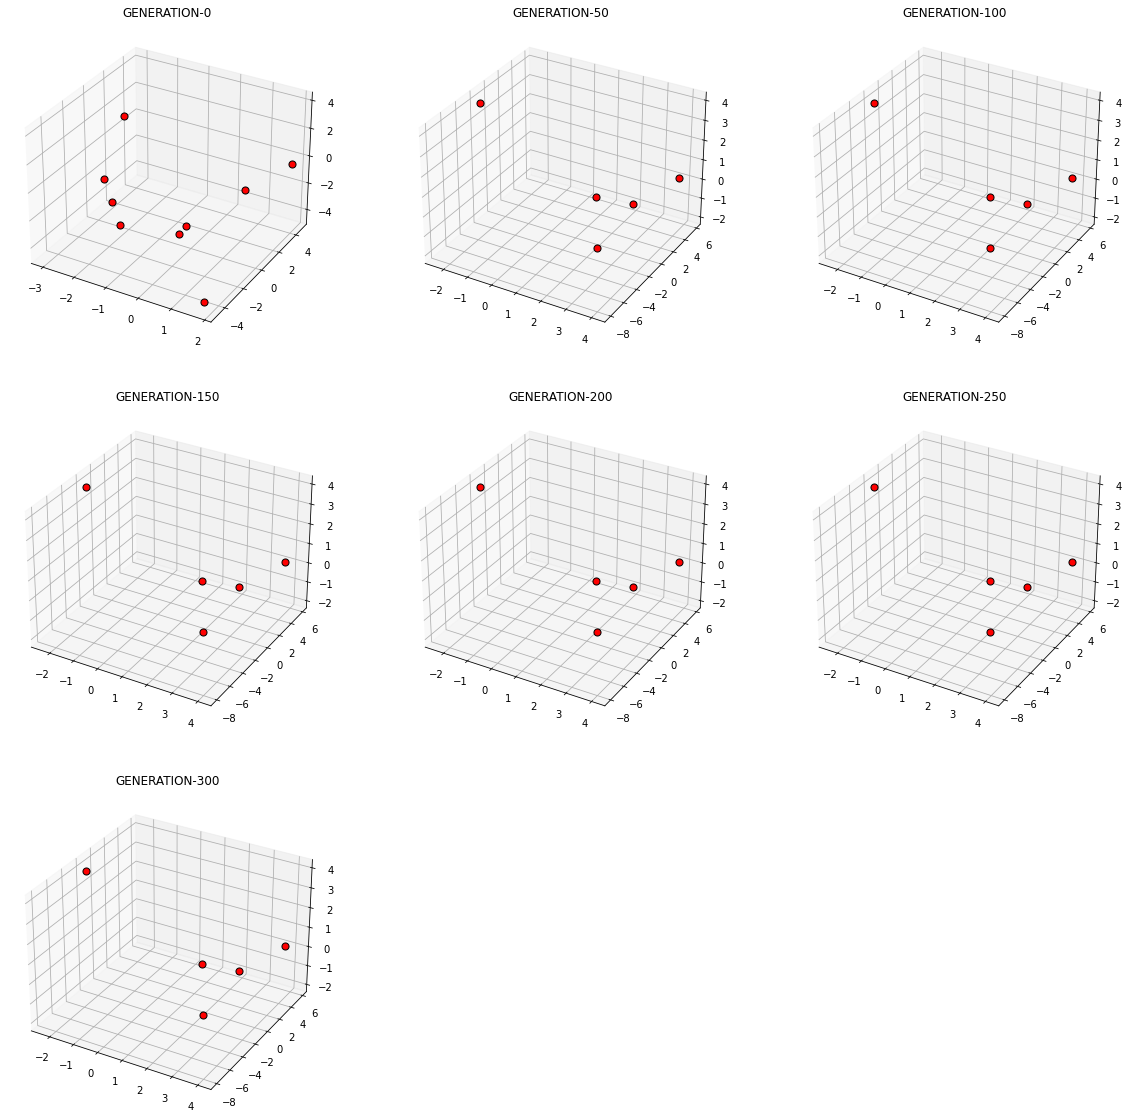

In [117]:
fig = plt.figure(figsize=(20,20))
for i,m in enumerate(BEST_FITNESS):
    model=PARAMS[GENS[i]][m][8][0]
    
    x=[m[0] for m in model]
    y=[m[1] for m in model]
    z=[m[2] for m in model]
    
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax.scatter3D(x,y,z,color="red",depthshade=False,s=50,edgecolor="black")
    ax.title.set_text(f"GENERATION-{GENS[i]}")
    
plt.show()